In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Read Data

In [182]:
df = pd.read_csv('E:\\CodSoft\\CODSOFT\\Task_02_Movie_Rating_Prediction\\IMDbMoviesIndia.csv', encoding='ISO-8859-1')


Exploring the Data

In [183]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [185]:
print(df.shape)

(15509, 10)


In [186]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [187]:
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [188]:
print(df.nunique())

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [189]:
df.isnull().sum()/len(df) *100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [190]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Text(0.5, 1.0, 'Missing values heatmap')

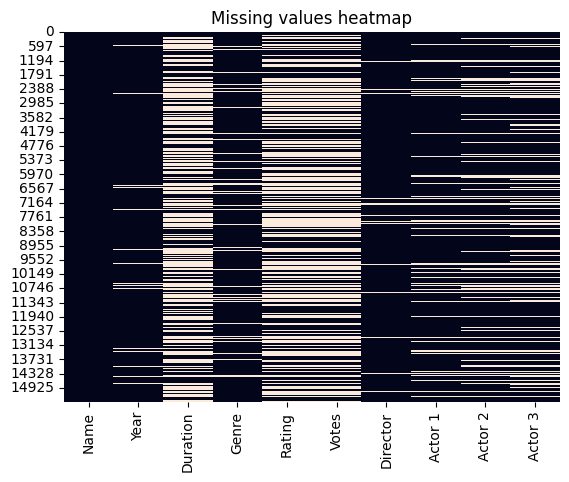

In [191]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [192]:
print(df.duplicated().sum())
print(df[['Year','Name','Director']].duplicated().sum())


6
11


In [193]:
duplicated_movies = df[df.duplicated(subset = ['Name', 'Year','Director'], keep = False)]
duplicated_movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
953,Amrit,(1941),153 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
954,Amrit,(1941),162 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
1249,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN


Data Preprocessing

In [194]:
df.drop_duplicates(subset=['Name', 'Year','Director'],inplace=True)
df.shape

(15498, 10)

In [195]:
df.dropna(inplace = True)
print(df.shape)

(5658, 10)


In [196]:
df['Duration'] = df['Duration'].str.strip('min')

In [197]:
df['Votes'] = df['Votes'].str.replace(',','').astype(int)


In [198]:
df['Year'] = df['Year'].str.strip('()').astype(int)

In [199]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5658 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5658 non-null   object 
 1   Year      5658 non-null   int32  
 2   Duration  5658 non-null   object 
 3   Genre     5658 non-null   object 
 4   Rating    5658 non-null   float64
 5   Votes     5658 non-null   int32  
 6   Director  5658 non-null   object 
 7   Actor 1   5658 non-null   object 
 8   Actor 2   5658 non-null   object 
 9   Actor 3   5658 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.0+ KB


Data Visualisation

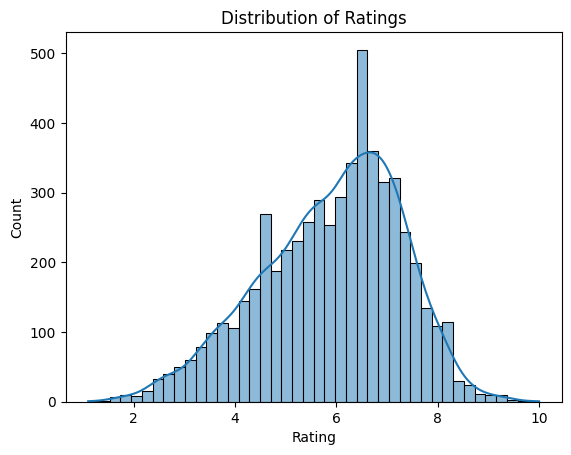

In [200]:
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of Ratings')
plt.show()

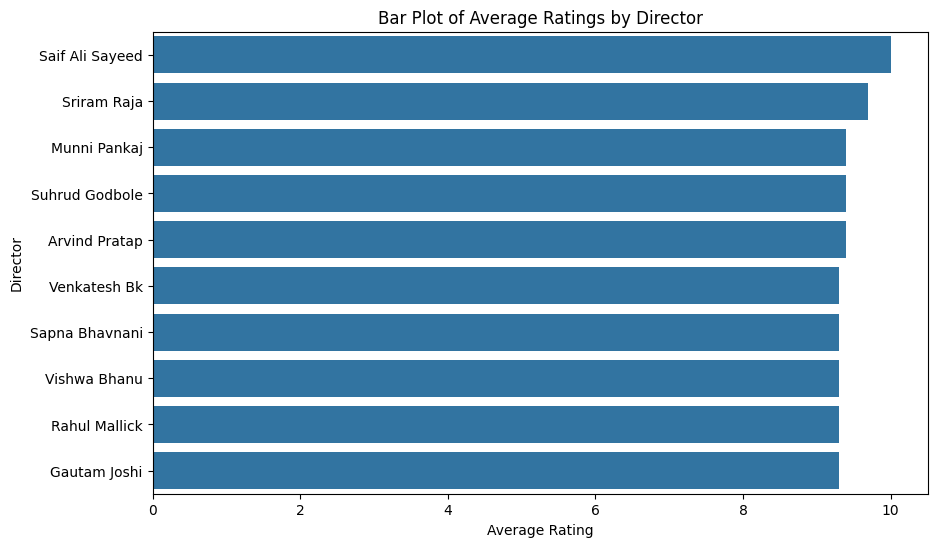

In [201]:
director_ratings = df.groupby('Director')['Rating'].mean().reset_index()
director_ratings = director_ratings.sort_values(by='Rating', ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=director_ratings, x='Rating', y='Director')
plt.title('Bar Plot of Average Ratings by Director')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

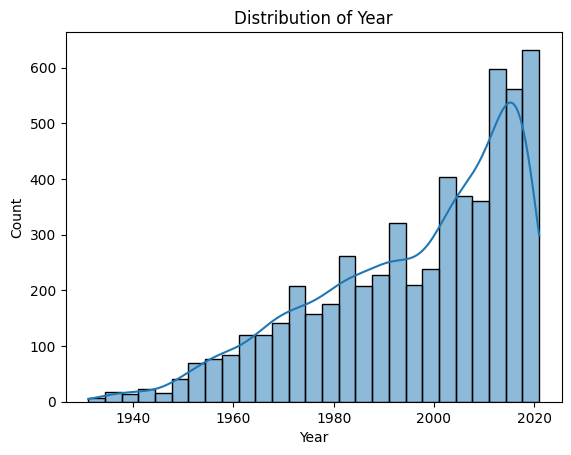

In [202]:
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of Year')
plt.show()

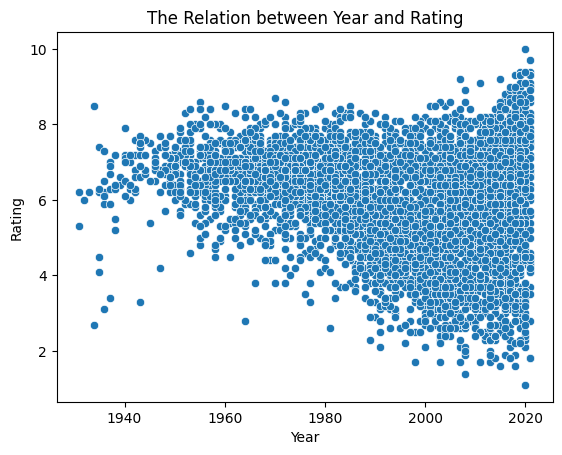

In [203]:
sns.scatterplot(data=df,x='Year',y='Rating')
plt.title("The Relation between Year and Rating")
plt.show()

In [204]:
df['Votes'].max()

591417

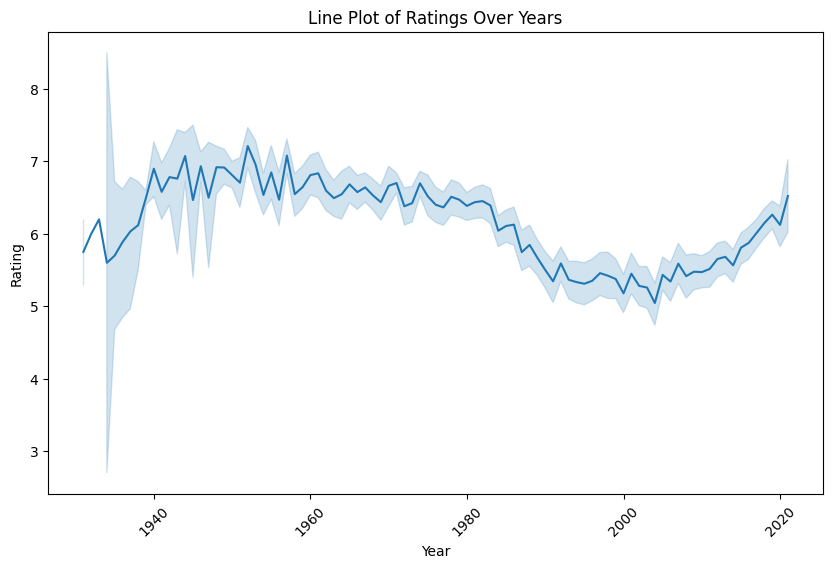

In [205]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating')
plt.title('Line Plot of Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


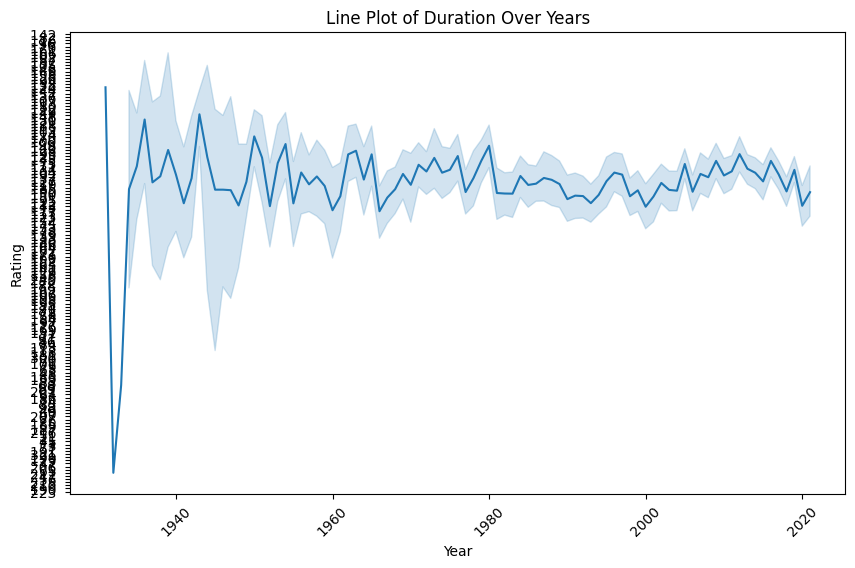

In [206]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Duration')
plt.title('Line Plot of Duration Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

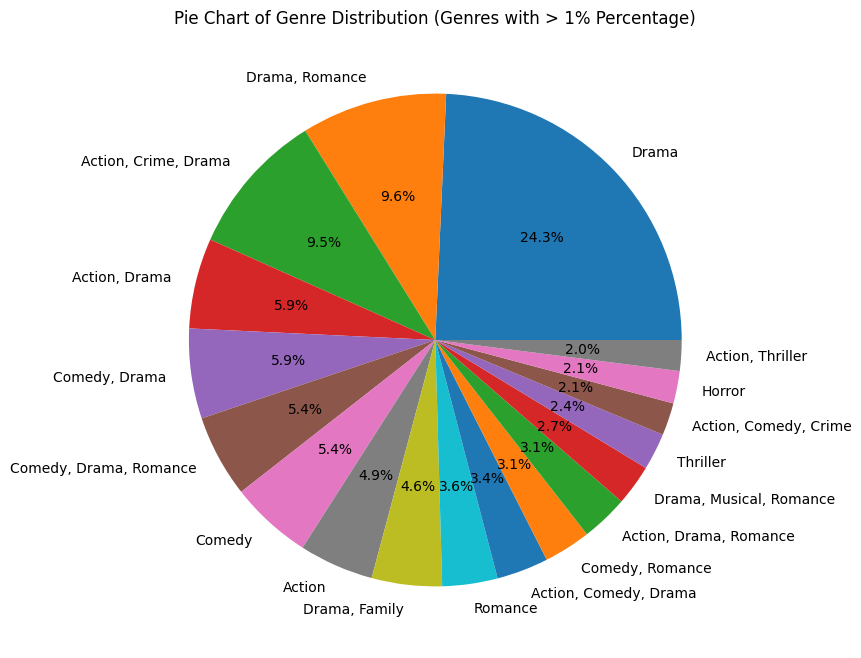

In [207]:
genre_percentage = df['Genre'].value_counts() / len(df) * 100

# Select genres with percentages greater than 1%
genre_percentage_filtered = genre_percentage[genre_percentage > 1]

plt.figure(figsize=(8, 8))
plt.pie(genre_percentage_filtered, labels=genre_percentage_filtered.index, autopct='%1.1f%%')
plt.title('Pie Chart of Genre Distribution (Genres with > 1% Percentage)')
plt.show()



In [208]:
encoder = LabelEncoder()

df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])


df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,229,6.1,408,1223,1861,1801,1615
15494,Zubeidaa,2001,153,133,6.2,1496,2059,763,1619,1184
15503,Zulm Ki Zanjeer,1989,125,28,5.8,44,1793,406,754,1685
15505,Zulmi,1999,129,38,4.5,655,1025,112,2164,314


In [209]:
df_corr = df.drop('Name',axis=1)

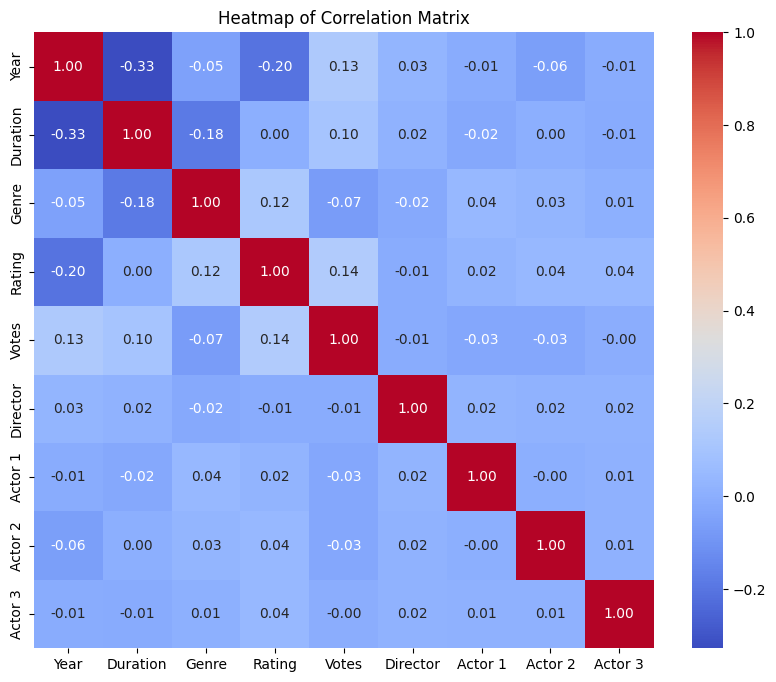

In [210]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


Model Selection and Building

In [211]:
df_not_norm =  df.drop('Name',axis=1)
df_not_norm.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [212]:
df_norm = df_not_norm.copy()

In [213]:
df_norm['Votes_zscore'] = (df_norm['Votes'] - df_norm['Votes'].mean()) / df_norm['Votes'].std()

# Threshold for outlier detection (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers based on Z-score
outliers = df_norm[(df_norm['Votes_zscore'] > outlier_threshold) | (df_norm['Votes_zscore'] < -outlier_threshold)]

# Step 2: Normalize Outliers
# Replace outlier values with normalized values (e.g., Min-Max Scaling)
# Define a function to normalize outliers
def normalize_outliers(value, min_val, max_val):
    # Apply Min-Max Scaling
    return (value - min_val) / (max_val - min_val)

# Calculate min and max values for 'Votes'
min_votes = df_norm['Votes'].min()
max_votes = df_norm['Votes'].max()

# Normalize outlier values
df_norm.loc[outliers.index, 'Votes'] = df.loc[outliers.index, 'Votes'].apply(
    lambda x: normalize_outliers(x, min_votes, max_votes))

# Drop the 'Votes_zscore' column
df_norm.drop('Votes_zscore', axis=1, inplace=True)

df_norm.head()

C:\Users\pc tec\AppData\Local\Temp\ipykernel_8996\3217884087.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.60513483 0.12700622 0.09112429 0.08590458 0.1317119  0.09129338
 0.13263681 0.13082589 0.10590079 0.12814248 0.08505407 0.09507247
 0.27910999 0.07410401 0.19846063 0.11520395 0.11012458 0.08527051
 0.12566705 0.37218217 0.14600651 0.09739234 0.09830541 0.08682441
 0.10067432 0.09476135 0.08830731 0.0828644  0.07806233 0.09985425
 0.10985066 0.08338857 0.18131015 0.07454194 0.08312141 1.
 0.29726316 0.37287204 0.07390449 0.12818137 0.17079295 0.09037524
 0.28431111 0.10457515 0.07605527 0.27468161 0.1935047  0.11460708
 0.08318059 0.08878075 0.14038268 0.08851528 0.14429027 0.13465571
 0.31301698 0.13245419 0.08811962 0.084327   0.07773938 0.08470576
 0.11893401]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_norm.loc[outliers.index, 'Votes'] =

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8.0,629,1352,2272,319
3,2019,110,184,4.4,35.0,1335,1198,719,2148
5,1997,147,157,4.7,827.0,1530,378,75,2045
6,2005,142,289,7.4,1086.0,2044,692,1112,2524
8,2012,82,320,5.6,326.0,135,1934,1175,1013


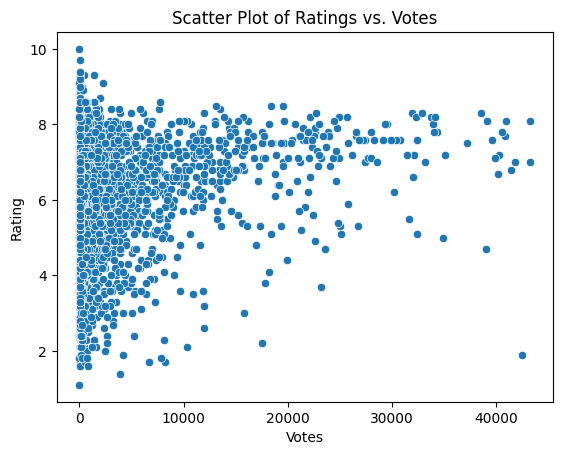

In [214]:
sns.scatterplot(data=df_norm, x='Votes', y='Rating')
plt.title('Scatter Plot of Ratings vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

In [215]:
x= df_not_norm.drop('Rating', axis=1)
y = df_not_norm['Rating']

x2= df_norm.drop('Rating', axis=1)
y2 = df_norm['Rating']

In [216]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)
X_train2, x_test2, Y_train2, y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=11)


1- Linear Regression

In [217]:

clf = LinearRegression() 

In [218]:
clf.fit(X_train,Y_train)


LinearRegression()

In [219]:
y_pred = clf.predict(x_test)
y_pred

array([5.88871709, 6.60446081, 5.31656277, ..., 5.73833991, 5.74175926,
       7.0822324 ])

In [220]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.691964610987617


In [221]:
print(f"R2 score : {r2_score(y_test,y_pred)}")

R2 score : 0.09993033673855867


In [222]:
clf.fit(X_train2,Y_train2)


LinearRegression()

In [223]:
y_pred2 = clf.predict(x_test2)
y_pred2

array([6.08136757, 6.65992397, 5.32848844, ..., 5.61130812, 5.64814963,
       5.40669757])

In [224]:
mse = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse)	

Mean Squared Error: 1.6681265047654315


In [229]:
print(f"R2 score : {r2_score(y_test2,y_pred2) *100}")

R2 score : 11.261142717086337


2-Random Forest Regressor

In [231]:
from sklearn.ensemble import RandomForestRegressor



rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, Y_train)


y_pred = rf_regressor.predict(x_test)


r2 = r2_score(y_test, y_pred)*100
print("R2 score: {:.2f}".format(r2))


R2 score: 34.96


Thank You